In [1]:
from cuqi.distribution import DistributionGallery
from cuqi.experimental.mcmc import MHNew

In [2]:
target = DistributionGallery("BivariateGaussian")

### Initialization
The new sampler is initialized same as the old one

In [3]:
sampler = MHNew(target, scale=0.1)
print(sampler)

 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [1. 1.] 
	 current_target_logd: [-3.99857481] 
	 scale: 0.1 
	 _scale_temp: 0.1 



### Tuning
However, the user API is now different and more object-oriented.
For example, we can "warm up" (tune) the sampler as follows

In [4]:
sampler.warmup(1000)

  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--


 20% (203 of 1000) |####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 40% (406 of 1000) |########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 60% (608 of 1000) |############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (811 of 1000) |#################    | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [-0.32775379 -0.36509814] 
	 current_target_logd: [-0.66226577] 
	 scale: 0.5581158710450473 
	 _scale_temp: 0.5581158710450473 

### Sampling
The sampling is also done in a more object-oriented way also. (Note the samples are NOT returned)

In [5]:
sampler.sample(1000)

  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
 20% (203 of 1000) |####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 41% (418 of 1000) |########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (633 of 1000) |#############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 84% (849 of 1000) |#################    | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [ 0.00362361 -0.39768433] 
	 current_target_logd: [-0.74434623] 
	 scale: 0.5581158710450473 
	 _scale_temp: 0.5581158710450473 

In [6]:
sampler.warmup(200)

  0% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (200 of 200) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [0.23802916 0.34015416] 
	 current_target_logd: [-0.44819739] 
	 scale: 0.8613049148151696 
	 _scale_temp: 0.8613049148151696 

### Getting the samples
The samples are obtained by calling the `get_samples` method

In [7]:
samples = sampler.get_samples()

array([[<Axes: title={'center': 'v0'}>, <Axes: title={'center': 'v0'}>],
       [<Axes: title={'center': 'v1'}>, <Axes: title={'center': 'v1'}>]],
      dtype=object)

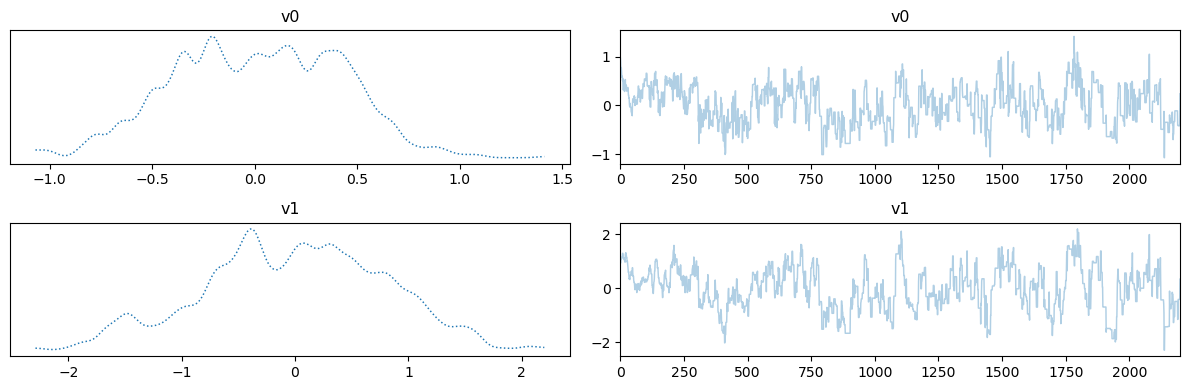

In [8]:
samples.plot_trace()

<Axes: xlabel='v0', ylabel='v1'>

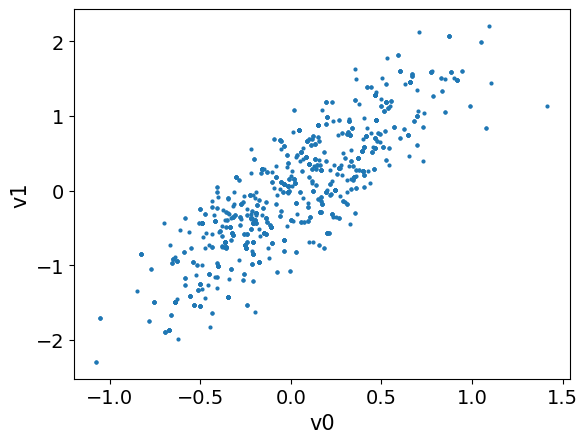

In [9]:
samples.burnthin(1000).plot_pair()

### Checkpointing
The sampler can be checkpointed and restored as follows

In [10]:
sampler.save_checkpoint('my_checkpoint.pickle')
sampler

 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [0.23802916 0.34015416] 
	 current_target_logd: [-0.44819739] 
	 scale: 0.8613049148151696 
	 _scale_temp: 0.8613049148151696 

In [11]:
sampler.warmup(200)

  0% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (200 of 200) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [0.24652558 0.478311  ] 
	 current_target_logd: [-0.43905805] 
	 scale: 0.8449682694684872 
	 _scale_temp: 0.8449682694684872 

In [12]:
sampler.load_checkpoint('my_checkpoint.pickle')
sampler

 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [0.23802916 0.34015416] 
	 current_target_logd: [-0.44819739] 
	 scale: 0.8613049148151696 
	 _scale_temp: 0.8613049148151696 

### Batching
The sampler run can be "batched" as follows (names to be decided)

In [13]:
sampler.sample(500, batch_size=100)

  0% (0 of 500) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 39% (197 of 500) |########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (406 of 500) |#################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [-0.47282299 -0.20981378] 
	 current_target_logd: [-1.84365627] 
	 scale: 0.8613049148151696 
	 _scale_temp: 0.8613049148151696 

In [14]:
!dir CUQI_samples

 Volume in drive C is Windows
 Volume Serial Number is 1CB3-A0D7

 Directory of c:\Users\nabr\git\CUQIpy\demos\CUQI_samples

22/04/2024  22.36    <DIR>          .
22/04/2024  22.36    <DIR>          ..
28/05/2024  22.34             2.120 batch_0000.npz
28/05/2024  22.34             2.120 batch_0001.npz
28/05/2024  22.34             2.120 batch_0002.npz
28/05/2024  22.34             2.120 batch_0003.npz
28/05/2024  22.34             2.120 batch_0004.npz
22/04/2024  21.51                 0 weqwe
               6 File(s)         10.600 bytes
               2 Dir(s)  121.767.579.648 bytes free


### Gibbs use-case
One feature we get from the new sampler design is more flexibility in our Gibbs sampling.
Now we can for example run NUTS-within-Gibbs as follows

In [1]:
import numpy as np
from cuqi.distribution import Gamma, Gaussian, GMRF, JointDistribution
from cuqi.experimental.mcmc import MHNew, NUTSNew, GibbsNew, ConjugateNew, LinearRTONew
from cuqi.sampler import Gibbs, Conjugate, LinearRTO, NUTS
from cuqi.testproblem import Deconvolution1D

In [2]:
# Forward problem
A, y_data, info = Deconvolution1D(dim=128, phantom='sinc', noise_std=0.001).get_components()

In [3]:
# Target
s = Gamma(1, 1e-4)
x = GMRF(np.zeros(A.domain_dim), 50)
y = Gaussian(A@x, lambda s: 1/s)

# %%
target = JointDistribution(y, x, s)(y=y_data)


In [4]:
# Old-style Gibbs. Only supports "Static" (non-adaptive) samplers
sampling_strategy = {
    "x" : LinearRTO,
    "s" : Conjugate
}

sampler = Gibbs(target, sampling_strategy)

# %%

samples = sampler.sample(200, 50)

Warmup 50 / 50
Sample 200 / 200


 None,

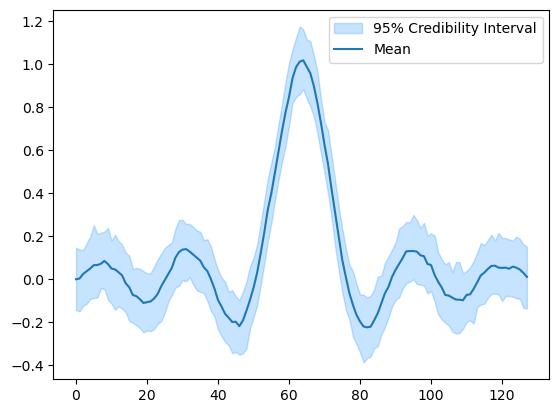

In [5]:
samples["x"].plot_ci()

In [7]:
# New-style Gibbs. Supports object-oriented that maintain state through iterations

sampling_strategy_new = {
    "x" : LinearRTONew(), # <--- Notice class instance
    "s" : ConjugateNew() # <--- Notice class instance
}

sampler_new = GibbsNew(target, sampling_strategy_new)

# Sample using new-style Gibbs
sampler_new.warmup(50)
sampler_new.sample(200)
samples_new = sampler_new.get_samples()


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


 12% (6 of 50) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:00
 24% (12 of 50) |#####                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (18 of 50) |########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 48% (24 of 50) |###########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 60% (30 of 50) |##############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (36 of 50) |#################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 84% (42 of 50) |####################    | Elapsed Time: 0:00:00 ETA:   0:00:00
 96% (48 of 50) |####################### | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (50 of 50) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  3% (6 of 200) |                        | Elapsed Time: 0:00:00 ETA:   0:00:01
  6% (13 of 200) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (21 of 200) |##                    

 None,

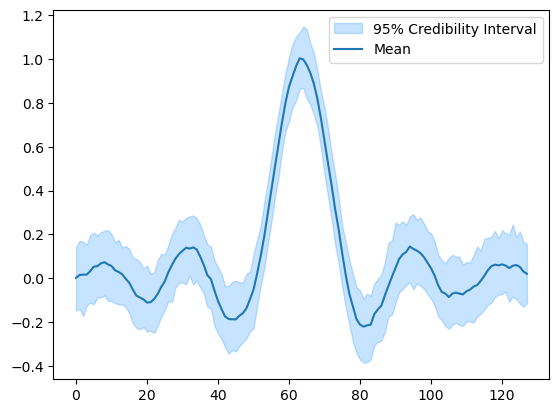

In [8]:
samples_new["x"].plot_ci()

In [9]:
# New-style Gibbs. Supports object-oriented that maintain state through iterations

sampling_strategy_new = {
    "x" : LinearRTONew(maxit=25), # <--- Notice we can set parameters like maxit now
    "s" : ConjugateNew()
}

sampler_new = GibbsNew(target, sampling_strategy_new)

# Sample using new-style Gibbs
sampler_new.warmup(50)
sampler_new.sample(200)
samples_new = sampler_new.get_samples()


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  8% (4 of 50) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:00
 16% (8 of 50) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 24% (12 of 50) |#####                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 32% (16 of 50) |#######                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 40% (20 of 50) |#########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 48% (24 of 50) |###########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 56% (28 of 50) |#############           | Elapsed Time: 0:00:00 ETA:   0:00:00
 64% (32 of 50) |###############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (36 of 50) |#################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 80% (40 of 50) |###################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 88% (44 of 50) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
 96% (48 of 50) |#######################

 None,

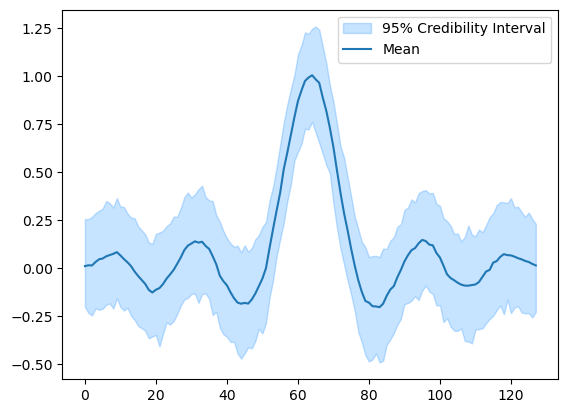

In [10]:
samples_new["x"].plot_ci()